In [96]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

Populating the interactive namespace from numpy and matplotlib


In [97]:
mll_results = pd.read_csv('../BreastCancer/BC_final_results.csv', index_col=0)

In [98]:
sim_mll_results = pd.read_csv('BC_sim_results.csv', index_col=0)

In [99]:
sample_info = pd.read_csv('../BreastCancer/BC_sample_info.csv', index_col=0)

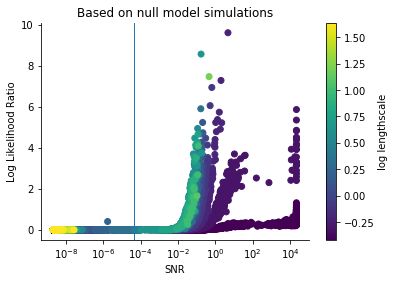

In [100]:
plt.title('Based on null model simulations')
plt.xscale('log')
plt.scatter( 1./ sim_mll_results.max_delta, sim_mll_results.D, c=np.log10(sim_mll_results.l))
plt.axvline(1./np.exp(10), lw=1);
plt.colorbar(label='log lengthscale');
plt.xlabel('SNR')
plt.ylabel('Log Likelihood Ratio');

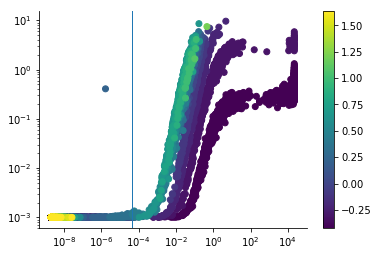

In [101]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(1./ sim_mll_results.max_delta, sim_mll_results.D, c=np.log10(sim_mll_results.l))
plt.axvline(1./ np.exp(10), lw=1);
plt.colorbar();

In [102]:
from scipy import stats

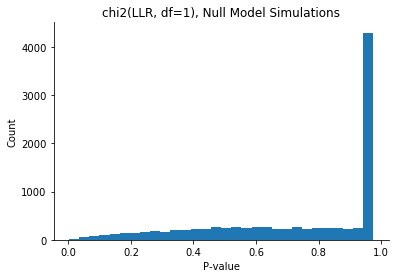

In [103]:
pval = 1 - stats.chi2.cdf(sim_mll_results.D, df=1)
plt.hist(pval, bins=30);
plt.title('chi2(LLR, df=1), Null Model Simulations');
plt.xlabel('P-value')
plt.ylabel('Count');

In [104]:
np.histogram(sim_mll_results.D, 10000)

(array([4120,   60,   48, ...,    0,    0,    1]),
 array([  9.99385484e-04,   1.95948044e-03,   2.91957539e-03, ...,
          9.60002875e+00,   9.60098884e+00,   9.60194894e+00]))

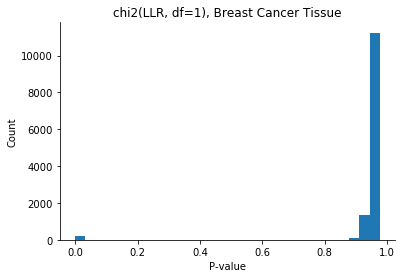

In [105]:
pval = 1 - stats.chi2.cdf(mll_results.LLR, df=1)
plt.hist(pval, bins=30);
plt.title('chi2(LLR, df=1), Breast Cancer Tissue');
plt.xlabel('P-value')
plt.ylabel('Count');

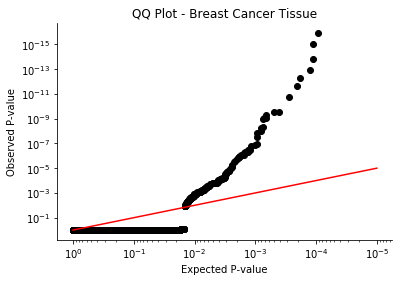

In [106]:
chi2_samples = pd.Series(stats.chi2.rvs(df=1, size=mll_results.LLR.shape[0]))
pval_samples = 1 - stats.chi2.cdf(chi2_samples.sort_values(), df=1)
pval_observed = 1 - stats.chi2.cdf(mll_results.LLR.sort_values(), df=1)

plt.loglog()
plt.scatter(pval_samples, pval_observed, marker='o', c='k', rasterized=True);
plt.plot([1e-5, 1], [1e-5, 1], c='r');

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.xlabel('Expected P-value')
plt.ylabel('Observed P-value');

plt.title('QQ Plot - Breast Cancer Tissue');
plt.savefig('bc_qq_plot.pdf');